In [0]:
import requests
import json
from datetime import datetime
import time

estados_mexico = [
    "Aguascalientes", "Baja California", "Baja California Sur", "Campeche", 
    "Chiapas", "Chihuahua", "Ciudad de México", "Coahuila", "Colima", 
    "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "Estado de México", 
    "Michoacán", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla", 
    "Querétaro", "Quintana Roo", "San Luis Potosí", "Sinaloa", "Sonora", 
    "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz", "Yucatán", "Zacatecas"
]

api_key = "7b64114cd06e7d4148e9729d2f1bf1a4" 
base_url = "http://api.weatherstack.com/current"

def fetch_weather_data(estados):
    weather_data_list = []
    for estado in estados:
        params = {
            "access_key": api_key,
            "query": estado,
        }
        response = requests.get(base_url, params=params)
        data = response.json()
        if "current" in data:
            weather_info = {
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "state": estado,
                "temperature": data["current"]["temperature"],
                "weather_descriptions": data["current"]["weather_descriptions"],
            }
            weather_data_list.append(weather_info)
        else:
            print(f"Error obteniendo datos para {estado}: {data}")
    return weather_data_list

# Prueba la función
weather_data = fetch_weather_data(estados_mexico)
print(weather_data)

[{'timestamp': '2024-11-18 23:11:26', 'state': 'Aguascalientes', 'temperature': 25, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:26', 'state': 'Baja California', 'temperature': 23, 'weather_descriptions': ['Patchy rain nearby']}, {'timestamp': '2024-11-18 23:11:27', 'state': 'Baja California Sur', 'temperature': 23, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:27', 'state': 'Campeche', 'temperature': 29, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:27', 'state': 'Chiapas', 'temperature': 23, 'weather_descriptions': ['Patchy rain nearby']}, {'timestamp': '2024-11-18 23:11:28', 'state': 'Chihuahua', 'temperature': 19, 'weather_descriptions': ['Sunny']}, {'timestamp': '2024-11-18 23:11:28', 'state': 'Ciudad de México', 'temperature': 25, 'weather_descriptions': ['Partly cloudy']}, {'timestamp': '2024-11-18 23:11:28', 'state': 'Coahuila', 'temperature': 27, 'weather_descriptions': ['Partly cloudy']

In [0]:
dbutils.fs.mkdirs("/FileStore/tables/weather_data/")
print("Carpeta creada exitosamente.")

Carpeta creada exitosamente.


In [0]:
dbutils.fs.mkdirs("/FileStore/tables/weather_data_gdl/")
print("Carpeta creada exitosamente.")

Carpeta creada exitosamente.


In [0]:
display(dbutils.fs.ls("/FileStore/tables/"))

path,name,size,modificationTime
dbfs:/FileStore/tables/8__Dataframes_y_Datasets_en_Databricks.dbc,8__Dataframes_y_Datasets_en_Databricks.dbc,19557,1727532429000
dbfs:/FileStore/tables/globalterrorismdb_0718dist-1.csv,globalterrorismdb_0718dist-1.csv,162812896,1731862895000
dbfs:/FileStore/tables/globalterrorismdb_0718dist.csv,globalterrorismdb_0718dist.csv,162812896,1731862806000
dbfs:/FileStore/tables/weather_data/,weather_data/,0,0
dbfs:/FileStore/tables/winequality.names,winequality.names,3305,1731943671000
dbfs:/FileStore/tables/winequality_red-1.csv,winequality_red-1.csv,84199,1731944091000
dbfs:/FileStore/tables/winequality_red.csv,winequality_red.csv,84199,1731943661000
dbfs:/FileStore/tables/winequality_white-1.csv,winequality_white-1.csv,264426,1731943993000
dbfs:/FileStore/tables/winequality_white.csv,winequality_white.csv,264426,1731943661000


In [0]:

# Define la ruta donde guardar los datos
directory_path = "/dbfs/FileStore/tables/weather_data/"
if not any(f.name == "weather_data/" for f in dbutils.fs.ls("/FileStore/tables/")):
    dbutils.fs.mkdirs(directory_path)

# Guarda cada registro como un archivo JSON
for record in weather_data:
    file_name = f"{directory_path}weather_{record['state']}_{int(time.time())}.json"
    json_data = json.dumps(record)
    dbutils.fs.put(file_name, json_data)
    print(f"Datos guardados en: {file_name}")

Wrote 125 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Aguascalientes_1731972107.json
Wrote 131 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Baja California_1731972107.json
Wrote 130 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Baja California Sur_1731972107.json
Wrote 119 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Campeche_1731972108.json
Wrote 123 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Chiapas_1731972108.json
Wrote 112 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Chihuahua_1731972108.json
Wrote 132 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Ciudad de México_1731972108.json
Wrote 119 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Coahuila_1731972108.json
Wrote 117 bytes.
Datos guardados en: /dbfs/FileStore/tables/weather_data/weather_Colima_1731972108.json
Wrote 109 bytes.

In [0]:
display(dbutils.fs.ls('/dbfs/FileStore/tables/weather_data/'))

path,name,size,modificationTime
dbfs:/dbfs/FileStore/tables/weather_data/weather_Aguascalientes_1731972107.json,weather_Aguascalientes_1731972107.json,125,1731972108000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Baja California Sur_1731972107.json,weather_Baja California Sur_1731972107.json,130,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Baja California_1731972107.json,weather_Baja California_1731972107.json,131,1731972108000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Campeche_1731972108.json,weather_Campeche_1731972108.json,119,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Chiapas_1731972108.json,weather_Chiapas_1731972108.json,123,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Chihuahua_1731972108.json,weather_Chihuahua_1731972108.json,112,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Ciudad de México_1731972108.json,weather_Ciudad de México_1731972108.json,132,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Coahuila_1731972108.json,weather_Coahuila_1731972108.json,119,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Colima_1731972108.json,weather_Colima_1731972108.json,117,1731972109000
dbfs:/dbfs/FileStore/tables/weather_data/weather_Durango_1731972108.json,weather_Durango_1731972108.json,109,1731972109000


In [0]:
from pyspark.sql.types import *
input_path="/dbfs/FileStore/tables/weather_data/"

jsonSchema = StructType([
    StructField("timestamp", TimestampType(), True),   
    StructField("state", StringType(), True),         
    StructField("temperature", DoubleType(), True),  
    StructField("weather_descriptions", ArrayType(StringType()), True) 
])

streaming_df = (spark.read\
    .schema(jsonSchema) \
    .json(input_path))

display(streaming_df)



timestamp,state,temperature,weather_descriptions
2024-11-18T23:11:28.000+0000,Ciudad de México,25.0,List(Partly cloudy)
2024-11-18T23:11:26.000+0000,Baja California,23.0,List(Patchy rain nearby)
2024-11-18T23:11:27.000+0000,Baja California Sur,23.0,List(Partly cloudy)
2024-11-18T23:11:31.000+0000,Michoacán,22.0,List(Light rain shower)
2024-11-18T23:11:30.000+0000,Estado de México,28.0,List(Overcast )
2024-11-18T23:11:33.000+0000,Quintana Roo,24.0,List(Light rain shower)
2024-11-18T23:11:26.000+0000,Aguascalientes,25.0,List(Partly cloudy)
2024-11-18T23:11:33.000+0000,Querétaro,25.0,List(Partly cloudy)
2024-11-18T23:11:33.000+0000,San Luis Potosí,20.0,List(Cloudy )
2024-11-18T23:11:27.000+0000,Chiapas,23.0,List(Patchy rain nearby)


In [0]:
from pyspark.sql.functions import *

windowed_df = streaming_df.groupBy(
    window(col("timestamp"), "1 hour"), col("state")
).agg(
    avg("temperature").alias("avg_temperature") 
)

windowed_df.createOrReplaceTempView("windowed_weather_data")

In [0]:
%sql select * from windowed_weather_data

window,state,avg_temperature
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Baja California,23.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Michoacán,22.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Baja California Sur,23.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Ciudad de México,25.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Querétaro,25.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Estado de México,28.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Aguascalientes,25.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Quintana Roo,24.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",Zacatecas,23.0
"List(2024-11-18T23:00:00.000+0000, 2024-11-19T00:00:00.000+0000)",San Luis Potosí,20.0


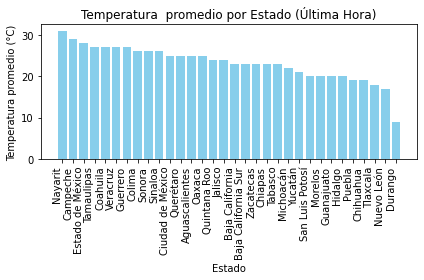

In [0]:

temperature_data = spark.sql("""
    SELECT 
        state, 
        avg_temperature 
    FROM windowed_weather_data
    ORDER BY avg_temperature DESC
""").toPandas()

import matplotlib.pyplot as plt

# Crear el gráfico
plt.bar(temperature_data['state'], temperature_data['avg_temperature'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Temperatura  promedio por Estado (Última Hora)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()